<a href="https://colab.research.google.com/github/jahnavinischal/Earthquake-analysis-prediction/blob/main/Earthquakeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe0 = pd.read_csv('/content/drive/MyDrive/Eartquakes-1990-2023.csv')

In [ ]:
dataframe0.value_counts

<bound method DataFrame.value_counts of                   time                                     place     status  \
0         631153353990         12 km NNW of Meadow Lakes, Alaska   reviewed   
1         631153491210                14 km S of Volcano, Hawaii   reviewed   
2         631154083450                7 km W of Cobb, California   reviewed   
3         631155512130      11 km E of Mammoth Lakes, California   reviewed   
4         631155824490                    16km N of Fillmore, CA   reviewed   
...                ...                                       ...        ...   
3445746  1690626851941                5 km NW of Chikusei, Japan   reviewed   
3445747  1690626975715              Kodiak Island region, Alaska  automatic   
3445748  1690627215940  12 km W of Alberto Oviedo Mota, B.C., MX  automatic   
3445749  1690628146040                        7 km W of Cobb, CA  automatic   
3445750  1690628937884                 35 km W of Karluk, Alaska  automatic   

         ts

In [ ]:
dataframe0.dtypes

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

In [ ]:
dataframe0.dtypes

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

In [ ]:
dataframe0.isnull().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [ ]:
dataframe0.status.unique()

array(['reviewed', 'automatic', 'AUTOMATIC', 'REVIEWED', 'MANUAL',
       'manual'], dtype=object)

In [ ]:
dataframe0.state.unique()

array([' Alaska', ' Hawaii', ' California', 'California', ' Washington',
       ' Greece', ' Italy', ' Albania', ' Utah', 'Fiji region', ' Japan',
       'south of the Fiji Islands', ' Saint Kitts and Nevis',
       ' Indonesia', 'Central California', ' Solomon Islands',
       ' Timor Leste', ' B.C.', ' Switzerland', ' New Caledonia',
       ' Colombia', ' Nevada', ' Wyoming', 'Philippine Islands region',
       'southern Mid-Atlantic Ridge', ' Papua New Guinea', ' Vanuatu',
       ' France', ' Spain', ' Austria', ' North Carolina', ' Guam',
       ' Chile', ' China', ' Montana', ' Philippines', ' Poland',
       ' Virginia', 'Utah', ' Russia', 'northwest of Australia',
       ' New Zealand', 'Northern California', ' Tonga', ' Idaho',
       ' Taiwan', 'Bosnia and Herzegovina region', ' Oregon',
       'southeast Indian Ridge', ' Slovenia', ' Iran', ' Afghanistan',
       'Owen Fracture Zone region', ' Canada', ' Peru', ' Missouri',
       ' Mexico', 'Mariana Islands region', ' German

In [ ]:
(dataframe0 == 0).sum()

time                  0
place                 0
status                0
tsunami         3444223
significance     163607
data_type             0
magnitudo         23097
state                 0
longitude            17
latitude              9
depth             63714
date                  0
dtype: int64

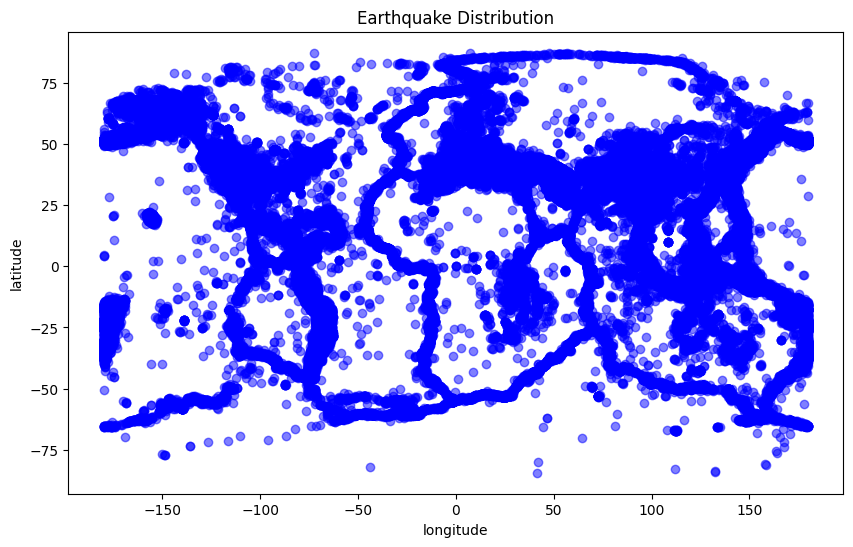

Mean Magnitude: 1.7740761405603154
Median Magnitude: 1.46
Standard Deviation of Magnitude: 1.291055102657228


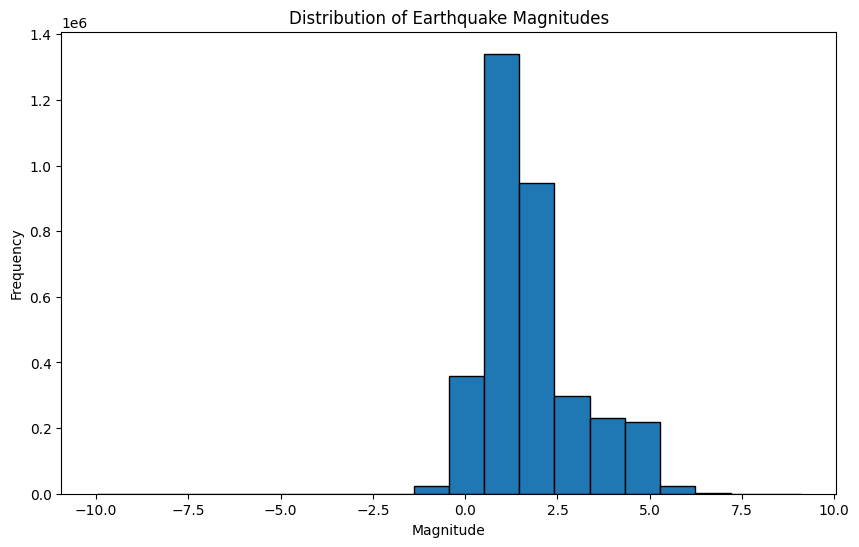

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



#Spatial Analysis
plt.figure(figsize=(10, 6))
plt.scatter(dataframe0['longitude'],dataframe0['latitude'], c='blue', alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Earthquake Distribution')
plt.show()

earthquake_counts_by_region = dataframe0['state'].value_counts()

#Magnitude Analysis
mean_magnitude = dataframe0['magnitudo'].mean()
median_magnitude = dataframe0['magnitudo'].median()
std_deviation_magnitude = dataframe0['magnitudo'].std()

print(f'Mean Magnitude: {mean_magnitude}')
print(f'Median Magnitude: {median_magnitude}')
print(f'Standard Deviation of Magnitude: {std_deviation_magnitude}')

# Create a histogram of earthquake magnitudes
plt.figure(figsize=(10, 6))
plt.hist(dataframe0['magnitudo'], bins=20, edgecolor='k')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

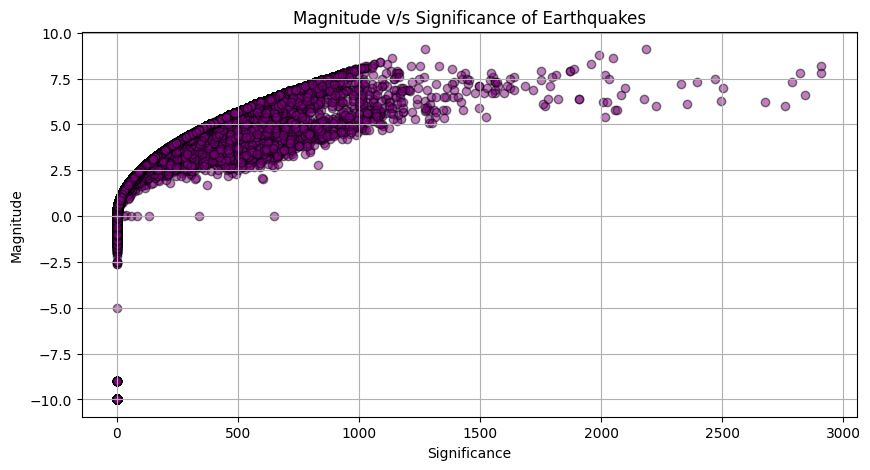

In [ ]:
magnitude = dataframe0['magnitudo']
significance = dataframe0['significance']

plt.figure(figsize=(10, 5))
plt.scatter(significance, magnitude, alpha=0.5, c='purple', edgecolors='k')

plt.xlabel('Significance')
plt.ylabel('Magnitude')
plt.title('Magnitude v/s Significance of Earthquakes')

plt.grid(True)
plt.show()

In [ ]:
dataframe0['tsunami'].unique()

array([0, 1])

In [ ]:
print((dataframe0['tsunami'] == 1).sum())

1528


In [ ]:
print((dataframe0['tsunami'] == 0).sum())

3444223


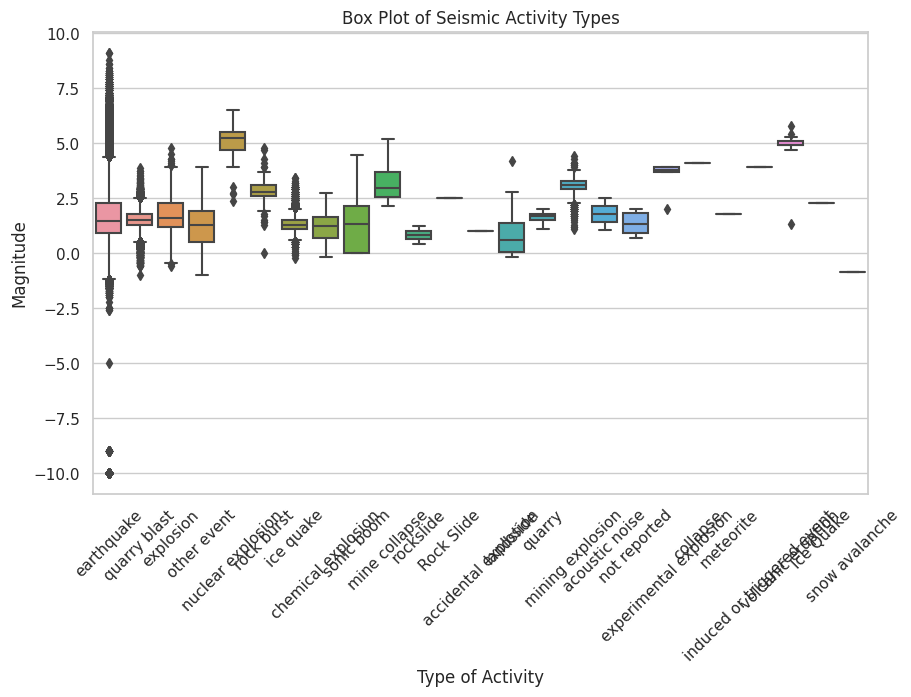

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the seismic activity data
# Replace 'Type of activity' with the actual column name in your dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a box plot for the 'Type of activity' column
sns.boxplot(x='data_type', y='magnitudo', data=dataframe0)

plt.title('Box Plot of Seismic Activity Types')
plt.xlabel('Type of Activity')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
#Calculate the value counts for each unique value in the 'state' column
import plotly.express as px
top10_states = dataframe0['state'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each state, x-axis: States,
# color-coded by states and using a color palette
fig = px.bar(
    y=top10_states.values,  # y-values: count of each state
    x=top10_states.index,   # x-values: states
    color=top10_states.index,  # Color the bars based on states
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_states.values,  # Display the count values on top of the bars
    title='Top 10 States with Highest Occurrences',  # Set the title of the plot
    template='plotly_white'  # Use a white template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Distribution of Earthquake Occurrences by State',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="State",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

<ipython-input-100-4d71f0bb1238>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



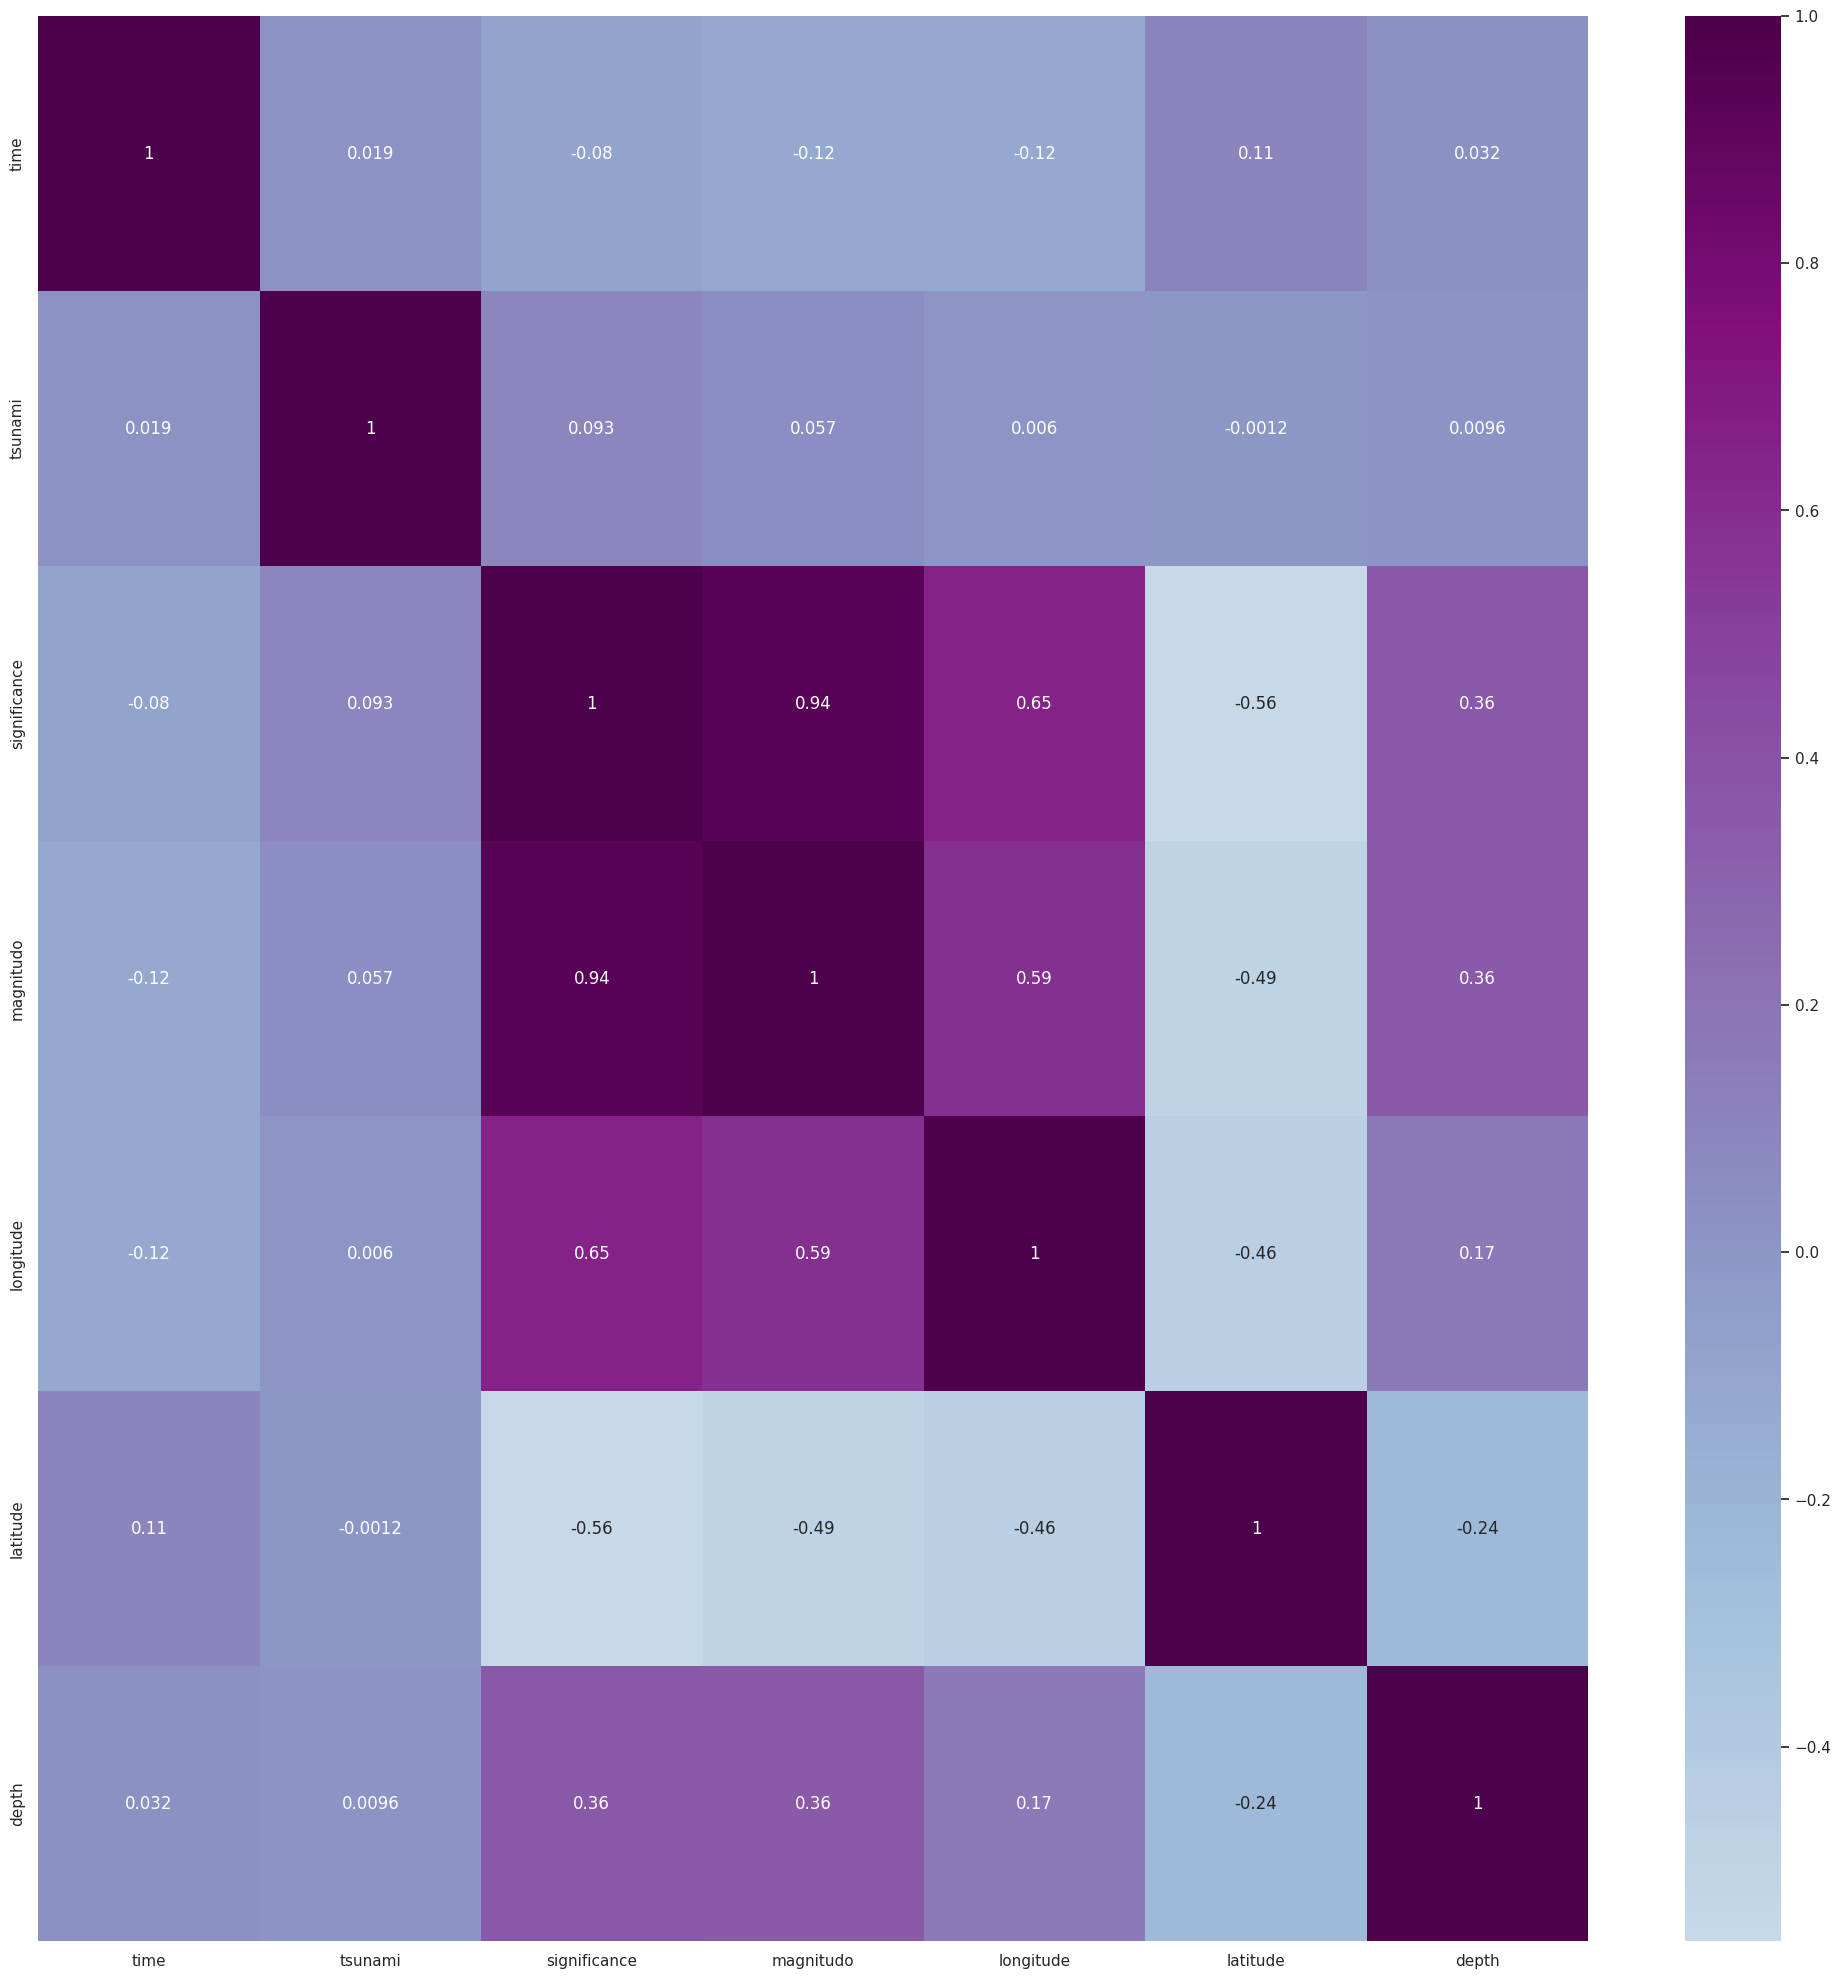

In [ ]:
Corr_Matrix = dataframe0.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(25,25))
sns.heatmap(Corr_Matrix, annot=True, cmap='BuPu', center=0)
plt.show()

In [ ]:
print('Top 5 Most Positively Correlated to the To magnitudo')
Corr_Matrix['magnitudo'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the To magnitudo


magnitudo       1.000000
significance    0.939378
longitude       0.590835
depth           0.356990
tsunami         0.057237
Name: magnitudo, dtype: float64

In [ ]:
print('Top 5 Most Positively Correlated to magnitudo ')
Corr_Matrix['magnitudo'].sort_values(ascending=True).head(5)

Top 5 Most Positively Correlated to magnitudo 


latitude    -0.494491
time        -0.119291
tsunami      0.057237
depth        0.356990
longitude    0.590835
Name: magnitudo, dtype: float64

In [ ]:
target_corr = Corr_Matrix['magnitudo'].abs().sort_values(ascending=False)
most_influential = target_corr[1:].idxmax()

print(f"The most influential factor is: {most_influential}")

The most influential factor is: significance


**PREDICTION**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Eartquakes-1990-2023.csv')

In [ ]:
dataframe.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [ ]:
dataframe = dataframe.drop(columns = ['place' , 'status' , 'data_type' , 'state' , 'date' , 'time' , 'tsunami'])

array([[<Axes: title={'center': 'magnitudo'}>]], dtype=object)

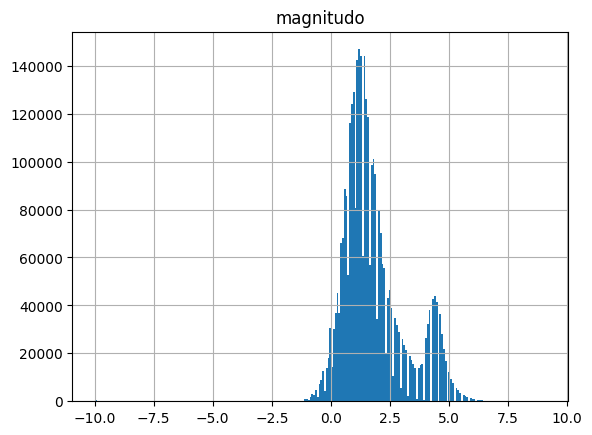

In [ ]:
dataframe.hist('magnitudo',bins = 250)

In [ ]:
dataframe = dataframe[dataframe['magnitudo'] > 0]

In [ ]:
dataframe.head()

,significance,magnitudo,longitude,latitude,depth
0,96,2.50,-149.669200,61.730200,30.100
1,31,1.41,-155.212333,19.317667,6.585
2,19,1.11,-122.806167,38.821000,3.220
3,15,0.98,-118.846333,37.664333,-0.584
4,134,2.95,-118.934000,34.546000,16.122


In [ ]:
dataframe.corr()

,significance,magnitudo,longitude,latitude,depth
significance,1.000000,0.957201,0.662790,-0.563783,0.364488
magnitudo,0.957201,1.000000,0.622885,-0.516398,0.366871
longitude,0.662790,0.622885,1.000000,-0.455191,0.167298
latitude,-0.563783,-0.516398,-0.455191,1.000000,-0.231962
depth,0.364488,0.366871,0.167298,-0.231962,1.000000


In [ ]:
dataframe.describe()

,significance,magnitudo,longitude,latitude,depth
count,3.333939e+06,3.333939e+06,3.333939e+06,3.333939e+06,3.333939e+06
mean,7.649146e+01,1.844484e+00,-1.010301e+02,3.736931e+01,2.321515e+01
std,1.024033e+02,1.244765e+00,7.728899e+01,2.056294e+01,5.533029e+01
min,0.000000e+00,1.000000e-02,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.500000e+01,1.000000e+00,-1.465836e+02,3.401873e+01,3.156000e+00
50%,3.500000e+01,1.500000e+00,-1.189680e+02,3.787283e+01,7.800000e+00
75%,8.100000e+01,2.300000e+00,-1.158150e+02,4.808533e+01,1.670000e+01
max,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [ ]:
magnitude_data = dataframe['magnitudo'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(magnitude_data)

cluster_centers = kmeans.cluster_centers_

print("Cluster Centers:", cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers: [[1.30871933]
 [3.95505719]]


In [ ]:
threshold_1 = 1.30871933  # Lower threshold
threshold_2 = 3.95505719  # Upper threshold

In [ ]:
def classify_magnitude(magnitude):
    if magnitude <= threshold_1:
        return 0  # Class 0
    elif magnitude > threshold_2:
        return 2  # Class 2
    else:
        return 1  # Class 1

In [ ]:
dataframe['magnitude_class'] = dataframe['magnitudo'].apply(classify_magnitude)

X = dataframe[['significance', 'longitude', 'latitude']]
y = dataframe['magnitude_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(random_state=42)

classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9967995824759893
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    279787
           1       1.00      1.00      1.00    310109
           2       1.00      1.00      1.00     76892

    accuracy                           1.00    666788
   macro avg       1.00      1.00      1.00    666788
weighted avg       1.00      1.00      1.00    666788

Confusion Matrix:
 [[279165    622      0]
 [  1353 308654    102]
 [     0     57  76835]]


In [ ]:
dataframe.head()

,significance,magnitudo,longitude,latitude,depth,magnitude_class
0,96,2.50,-149.669200,61.730200,30.100,1
1,31,1.41,-155.212333,19.317667,6.585,1
2,19,1.11,-122.806167,38.821000,3.220,0
3,15,0.98,-118.846333,37.664333,-0.584,0
4,134,2.95,-118.934000,34.546000,16.122,1


In [ ]:
class_0 = dataframe[dataframe['magnitude_class'] == 0]
class_1 = dataframe[dataframe['magnitude_class'] == 1]
class_2 = dataframe[dataframe['magnitude_class'] == 2]

X_train_reg_0, X_test_reg_0, y_train_reg_0, y_test_reg_0 = train_test_split(class_0[['significance', 'longitude', 'latitude']], class_0['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_1, X_test_reg_1, y_train_reg_1, y_test_reg_1 = train_test_split(class_1[['significance', 'longitude', 'latitude']], class_1['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_2, X_test_reg_2, y_train_reg_2, y_test_reg_2 = train_test_split(class_2[['significance', 'longitude', 'latitude']], class_2['magnitudo'], test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg_0 = scaler_reg.fit_transform(X_train_reg_0)
X_test_scaled_reg_0 = scaler_reg.transform(X_test_reg_0)
X_train_scaled_reg_1 = scaler_reg.fit_transform(X_train_reg_1)
X_test_scaled_reg_1 = scaler_reg.transform(X_test_reg_1)
X_train_scaled_reg_2 = scaler_reg.fit_transform(X_train_reg_2)
X_test_scaled_reg_2 = scaler_reg.transform(X_test_reg_2)

# Add in diff models
regression_model_0 = ExtraTreesRegressor(n_estimators=5, random_state=42)
regression_model_1 = ExtraTreesRegressor(n_estimators=5, random_state=42)
regression_model_2 = ExtraTreesRegressor(n_estimators=5, random_state=42)

regression_model_0.fit(X_train_scaled_reg_0, y_train_reg_0)
regression_model_1.fit(X_train_scaled_reg_1, y_train_reg_1)
regression_model_2.fit(X_train_scaled_reg_2, y_train_reg_2)

y_pred_reg_0 = regression_model_0.predict(X_test_scaled_reg_0)
y_pred_reg_1 = regression_model_1.predict(X_test_scaled_reg_1)
y_pred_reg_2 = regression_model_2.predict(X_test_scaled_reg_2)

In [ ]:
reg_0_mae = mean_absolute_error(y_test_reg_0, y_pred_reg_0)
reg_1_mae = mean_absolute_error(y_test_reg_1, y_pred_reg_1)
reg_2_mae = mean_absolute_error(y_test_reg_2, y_pred_reg_2)

reg_0_mse = mean_squared_error(y_test_reg_0, y_pred_reg_0)
reg_1_mse = mean_squared_error(y_test_reg_1, y_pred_reg_1)
reg_2_mse = mean_squared_error(y_test_reg_2, y_pred_reg_2)

reg_0_r2 = r2_score(y_test_reg_0, y_pred_reg_0)
reg_1_r2 = r2_score(y_test_reg_1, y_pred_reg_1)
reg_2_r2 = r2_score(y_test_reg_2, y_pred_reg_2)

print("Regression Model 0 - MAE:", reg_0_mae)
print("Regression Model 1 - MAE:", reg_1_mae)
print("Regression Model 2 - MAE:", reg_2_mae)

print("Regression Model 0 - MSE:", reg_0_mse)
print("Regression Model 1 - MSE:", reg_1_mse)
print("Regression Model 2 - MSE:", reg_2_mse)

print("Regression Model 0 - R^2 Score:", reg_0_r2)
print("Regression Model 1 - R^2 Score:", reg_1_r2)
print("Regression Model 2 - R^2 Score:", reg_2_r2)


Regression Model 0 - MAE: 0.010306144185648245
Regression Model 1 - MAE: 0.0035899786759279978
Regression Model 2 - MAE: 0.004208482293769389
Regression Model 0 - MSE: 0.00036686053907790747
Regression Model 1 - MSE: 0.0003976036277962387
Regression Model 2 - MSE: 0.0019947473996952585
Regression Model 0 - R^2 Score: 0.9966556515586794
Regression Model 1 - R^2 Score: 0.999013551944914
Regression Model 2 - R^2 Score: 0.9894786463723302


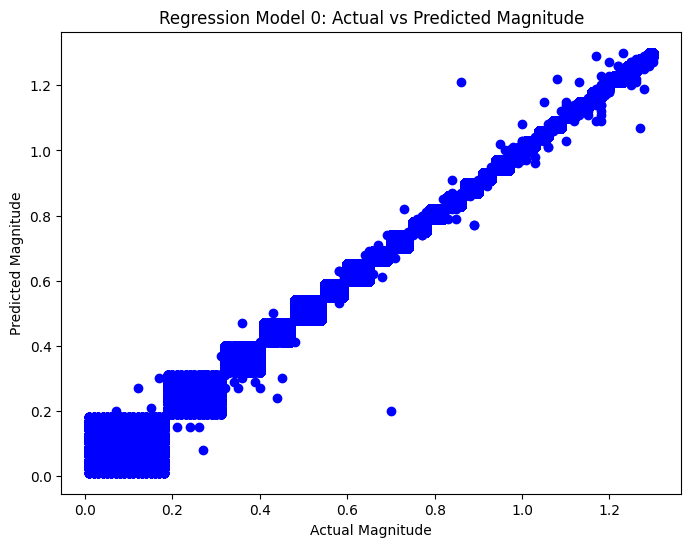

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_0, y_pred_reg_0, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 0: Actual vs Predicted Magnitude')
plt.show()

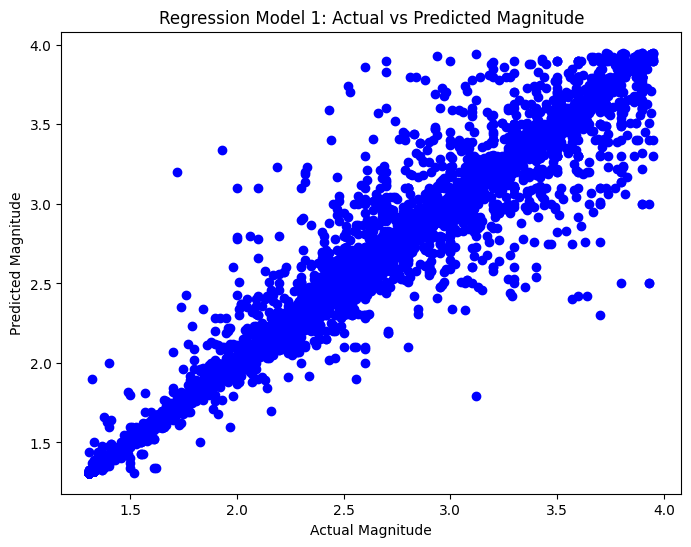

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_1, y_pred_reg_1, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 1: Actual vs Predicted Magnitude')
plt.show()

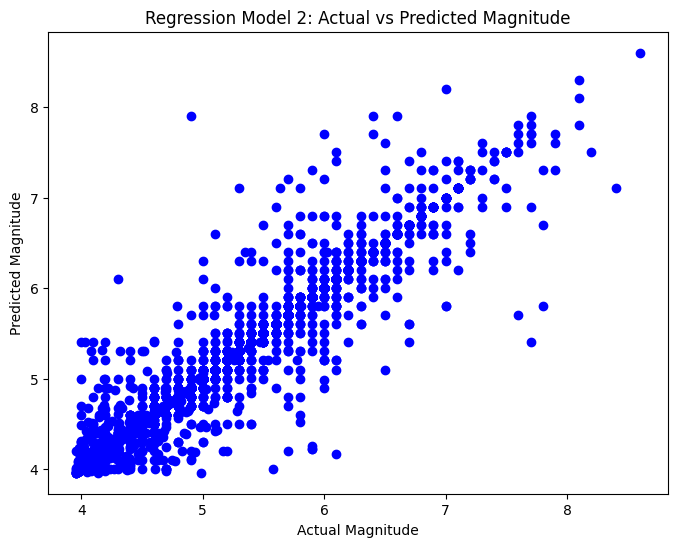

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_2, y_pred_reg_2, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 2: Actual vs Predicted Magnitude')
plt.show()

DECISION TREE REGRESSOR



In [ ]:
class_0 = dataframe[dataframe['magnitude_class'] == 0]
class_1 = dataframe[dataframe['magnitude_class'] == 1]
class_2 = dataframe[dataframe['magnitude_class'] == 2]

X_train_reg_0, X_test_reg_0, y_train_reg_0, y_test_reg_0 = train_test_split(class_0[['significance', 'longitude', 'latitude']], class_0['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_1, X_test_reg_1, y_train_reg_1, y_test_reg_1 = train_test_split(class_1[['significance', 'longitude', 'latitude']], class_1['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_2, X_test_reg_2, y_train_reg_2, y_test_reg_2 = train_test_split(class_2[['significance', 'longitude', 'latitude']], class_2['magnitudo'], test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg_0 = scaler_reg.fit_transform(X_train_reg_0)
X_test_scaled_reg_0 = scaler_reg.transform(X_test_reg_0)
X_train_scaled_reg_1 = scaler_reg.fit_transform(X_train_reg_1)
X_test_scaled_reg_1 = scaler_reg.transform(X_test_reg_1)
X_train_scaled_reg_2 = scaler_reg.fit_transform(X_train_reg_2)
X_test_scaled_reg_2 = scaler_reg.transform(X_test_reg_2)

# Add in diff models
regression_dt_0 = DecisionTreeRegressor( random_state=42)
regression_dt_1 = DecisionTreeRegressor( random_state=42)
regression_dt_2 = DecisionTreeRegressor( random_state=42)

regression_dt_0.fit(X_train_scaled_reg_0, y_train_reg_0)
regression_dt_1.fit(X_train_scaled_reg_1, y_train_reg_1)
regression_dt_2.fit(X_train_scaled_reg_2, y_train_reg_2)

y_pred_reg_0 = regression_dt_0.predict(X_test_scaled_reg_0)
y_pred_reg_1 = regression_dt_1.predict(X_test_scaled_reg_1)
y_pred_reg_2 = regression_dt_2.predict(X_test_scaled_reg_2)

In [ ]:
reg_0_mae = mean_absolute_error(y_test_reg_0, y_pred_reg_0)
reg_1_mae = mean_absolute_error(y_test_reg_1, y_pred_reg_1)
reg_2_mae = mean_absolute_error(y_test_reg_2, y_pred_reg_2)

reg_0_mse = mean_squared_error(y_test_reg_0, y_pred_reg_0)
reg_1_mse = mean_squared_error(y_test_reg_1, y_pred_reg_1)
reg_2_mse = mean_squared_error(y_test_reg_2, y_pred_reg_2)

reg_0_r2 = r2_score(y_test_reg_0, y_pred_reg_0)
reg_1_r2 = r2_score(y_test_reg_1, y_pred_reg_1)
reg_2_r2 = r2_score(y_test_reg_2, y_pred_reg_2)

print("Regression Model 0 - MAE:", reg_0_mae)
print("Regression Model 1 - MAE:", reg_1_mae)
print("Regression Model 2 - MAE:", reg_2_mae)

print("Regression Model 0 - MSE:", reg_0_mse)
print("Regression Model 1 - MSE:", reg_1_mse)
print("Regression Model 2 - MSE:", reg_2_mse)

print("Regression Model 0 - R^2 Score:", reg_0_r2)
print("Regression Model 1 - R^2 Score:", reg_1_r2)
print("Regression Model 2 - R^2 Score:", reg_2_r2)


Regression Model 0 - MAE: 0.011426740332777411
Regression Model 1 - MAE: 0.003766684757455676
Regression Model 2 - MAE: 0.004522190431633607
Regression Model 0 - MSE: 0.0005094310306562873
Regression Model 1 - MSE: 0.0005852549783325875
Regression Model 2 - MSE: 0.002957509582099971
Regression Model 0 - R^2 Score: 0.9953559603940562
Regression Model 1 - R^2 Score: 0.9985479920334092
Regression Model 2 - R^2 Score: 0.984400529021745


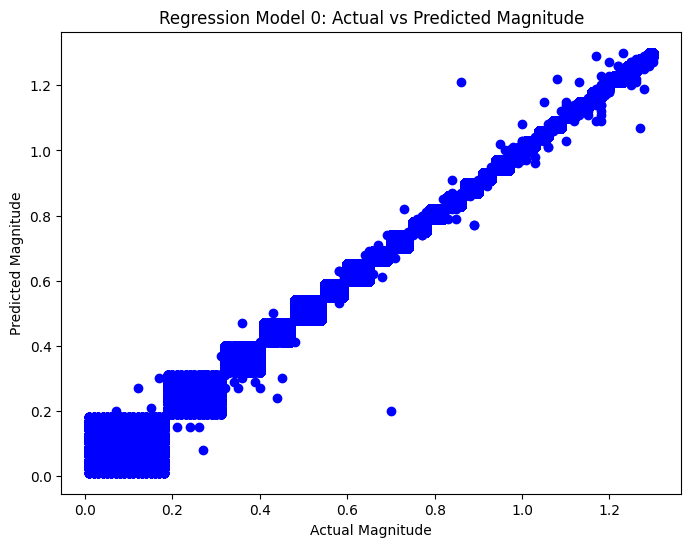

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_0, y_pred_reg_0, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 0: Actual vs Predicted Magnitude')
plt.show()

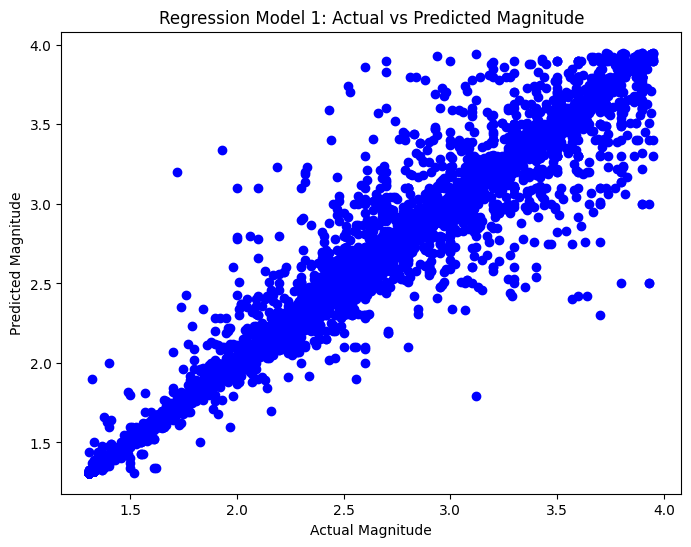

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_1, y_pred_reg_1, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 1: Actual vs Predicted Magnitude')
plt.show()

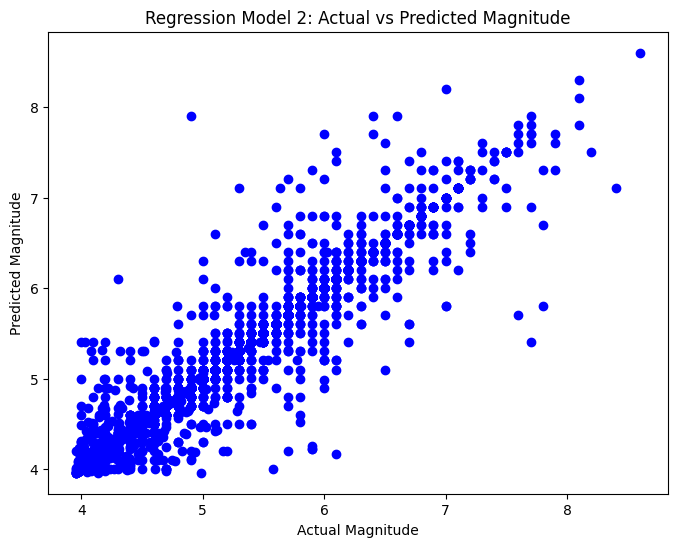

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_2, y_pred_reg_2, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 2: Actual vs Predicted Magnitude')
plt.show()

In [ ]:
#   significance	magnitudo	longitude	latitude	depth
# 0	    96	        2.50	-149.669200	    61.730200	30.100
# 1 	31	        1.41	-155.212333	    19.317667	6.585
# 2	    19	        1.11	-122.806167	    38.821000	3.220
# 3	    15	        0.98	-118.846333	    37.664333	-0.584
# 4	    134	        2.95	-118.934000	    34.546000	16.122

In [ ]:
dataframe[(dataframe['magnitudo'] > 6.0) & (dataframe['magnitudo'] < 8.0)]

,significance,magnitudo,longitude,latitude,depth,magnitude_class
451,650,6.5,-172.8500,-15.3970,53.500,2
1240,611,6.3,95.2410,24.7530,119.200,2
1972,572,6.1,-177.4670,-29.7090,58.300,2
3197,591,6.2,96.1000,3.8850,45.700,2
5146,611,6.3,71.2500,37.0470,109.900,2
...,...,...,...,...,...,...
3440597,637,6.3,-93.8771,15.0337,35.000,2
3441336,896,7.2,-160.7604,54.4596,32.571,2
3441774,900,6.6,-70.4688,-38.1951,186.000,2
3442480,784,6.5,-88.1265,12.8140,69.727,2


In [ ]:
input_df = pd.DataFrame({
    'significance': [650],
    'longitude': [-172.8500],
    'latitude': [-15.3970]
})

input_features = scaler_reg.transform(input_df)

input_class = classifier.predict(input_features)[0]

print(f'Magnitude Class is {input_class}')

if input_class == 0:
    predicted_magnitude = regression_dt_0.predict(input_features)
elif input_class == 1:
    predicted_magnitude = regression_dt_1.predict(input_features)
else:
    predicted_magnitude = regression_dt_2.predict(input_features)

print("Predicted Magnitude:", predicted_magnitude[0])


Magnitude Class is 2
Predicted Magnitude: 6.5


**Random Forest Regressor**


In [ ]:
class_0 = dataframe[dataframe['magnitude_class'] == 0]
class_1 = dataframe[dataframe['magnitude_class'] == 1]
class_2 = dataframe[dataframe['magnitude_class'] == 2]

X_train_reg_rf0, X_test_reg_rf0, y_train_reg_rf0, y_test_reg_rf0 = train_test_split(class_0[['significance', 'longitude', 'latitude']], class_0['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_rf1, X_test_reg_rf1, y_train_reg_rf1, y_test_reg_rf1 = train_test_split(class_1[['significance', 'longitude', 'latitude']], class_1['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_rf2, X_test_reg_rf2, y_train_reg_rf2, y_test_reg_rf2 = train_test_split(class_2[['significance', 'longitude', 'latitude']], class_2['magnitudo'], test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg_rf0 = scaler_reg.fit_transform(X_train_reg_rf0)
X_test_scaled_reg_rf0 = scaler_reg.transform(X_test_reg_rf0)
X_train_scaled_reg_rf1 = scaler_reg.fit_transform(X_train_reg_rf1)
X_test_scaled_reg_rf1 = scaler_reg.transform(X_test_reg_rf1)
X_train_scaled_reg_rf2 = scaler_reg.fit_transform(X_train_reg_rf2)
X_test_scaled_reg_rf2 = scaler_reg.transform(X_test_reg_rf2)

# Add in diff models
regression_model_rf0 = RandomForestRegressor(n_estimators=5, random_state=42)
regression_model_rf1 = RandomForestRegressor(n_estimators=5, random_state=42)
regression_model_rf2 = RandomForestRegressor(n_estimators=5, random_state=42)

regression_model_rf0.fit(X_train_scaled_reg_rf0, y_train_reg_rf0)
regression_model_rf1.fit(X_train_scaled_reg_rf1, y_train_reg_rf1)
regression_model_rf2.fit(X_train_scaled_reg_rf2, y_train_reg_rf2)

y_pred_reg_rf0 = regression_model_rf0.predict(X_test_scaled_reg_rf0)
y_pred_reg_rf1 = regression_model_rf1.predict(X_test_scaled_reg_rf1)
y_pred_reg_rf2 = regression_model_rf2.predict(X_test_scaled_reg_rf2)

In [ ]:
reg_0_mae_rf = mean_absolute_error(y_test_reg_rf0, y_pred_reg_rf0)
reg_1_mae_rf = mean_absolute_error(y_test_reg_rf1, y_pred_reg_rf1)
reg_2_mae_rf = mean_absolute_error(y_test_reg_rf2, y_pred_reg_rf2)

reg_0_mse_rf = mean_squared_error(y_test_reg_rf0, y_pred_reg_rf0)
reg_1_mse_rf = mean_squared_error(y_test_reg_rf1, y_pred_reg_rf1)
reg_2_mse_rf = mean_squared_error(y_test_reg_rf2, y_pred_reg_rf2)

reg_0_r2_rf = r2_score(y_test_reg_rf0, y_pred_reg_rf0)
reg_1_r2_rf = r2_score(y_test_reg_rf1, y_pred_reg_rf1)
reg_2_r2_rf = r2_score(y_test_reg_rf2, y_pred_reg_rf2)

print("Regression Model 0 - MAE:", reg_0_mae_rf)
print("Regression Model 1 - MAE:", reg_1_mae_rf)
print("Regression Model 2 - MAE:", reg_2_mae_rf)

print("Regression Model 0 - MSE:", reg_0_mse_rf)
print("Regression Model 1 - MSE:", reg_1_mse_rf)
print("Regression Model 2 - MSE:", reg_2_mse_rf)

print("Regression Model 0 - R^2 Score:", reg_0_r2_rf)
print("Regression Model 1 - R^2 Score:", reg_1_r2_rf)
print("Regression Model 2 - R^2 Score:", reg_2_r2_rf)

Regression Model 0 - MAE: 0.010183816717589883
Regression Model 1 - MAE: 0.003624915567867972
Regression Model 2 - MAE: 0.003983127295337773
Regression Model 0 - MSE: 0.00035066385661977986
Regression Model 1 - MSE: 0.000408449834845864
Regression Model 2 - MSE: 0.0017820041585141207
Regression Model 0 - R^2 Score: 0.9968033026248572
Regression Model 1 - R^2 Score: 0.9989866426837776
Regression Model 2 - R^2 Score: 0.9906007668336504


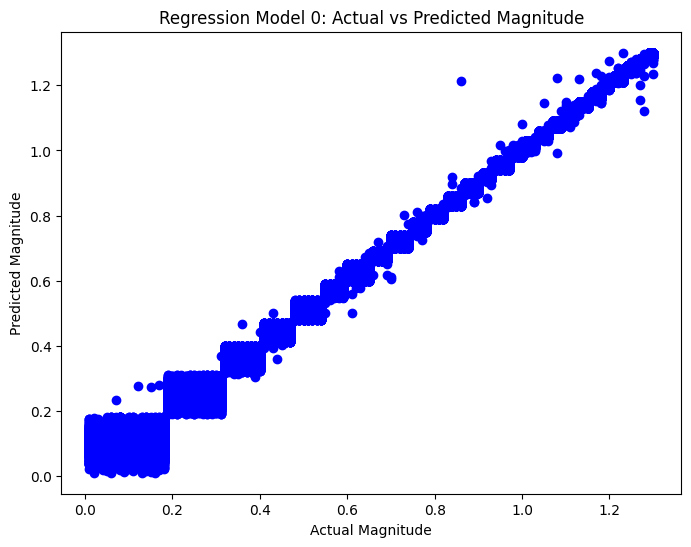

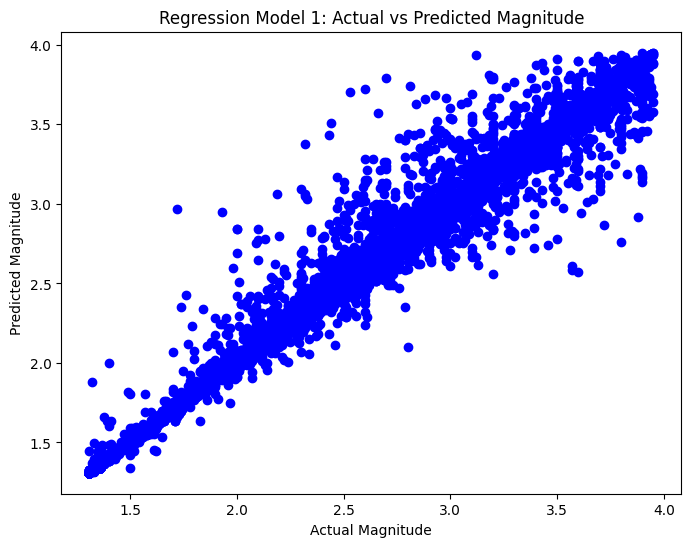

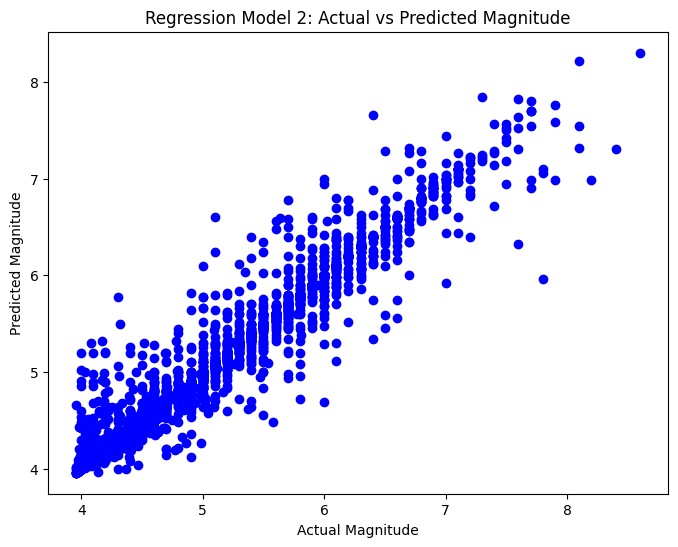

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_rf0, y_pred_reg_rf0, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 0: Actual vs Predicted Magnitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_rf1, y_pred_reg_rf1, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 1: Actual vs Predicted Magnitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_rf2, y_pred_reg_rf2, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 2: Actual vs Predicted Magnitude')
plt.show()

In [ ]:
dataframe[(dataframe['magnitudo'] > 6.0) & (dataframe['magnitudo'] < 8.0)]

In [ ]:
input_df = pd.DataFrame({
    'significance': [637],
    'longitude': [-93.8771],
    'latitude': [15.0337]
})

input_features = scaler_reg.transform(input_df)

input_class = classifier.predict(input_features)[0]

print(f'Magnitude Class is {input_class}')

if input_class == 0:
    predicted_magnitude = regression_model_rf0.predict(input_features)
elif input_class == 1:
    predicted_magnitude = regression_model_rf1.predict(input_features)
else:
    predicted_magnitude = regression_model_rf2.predict(input_features)

print("Predicted Magnitude:", predicted_magnitude[0])

Magnitude Class is 2
Predicted Magnitude: 6.300000000000001


Decision Tree Regressor

In [ ]:
class_0 = dataframe[dataframe['magnitude_class'] == 0]
class_1 = dataframe[dataframe['magnitude_class'] == 1]
class_2 = dataframe[dataframe['magnitude_class'] == 2]

X_train_reg_dt0, X_test_reg_dt0, y_train_reg_dt0, y_test_reg_dt0 = train_test_split(class_0[['significance', 'longitude', 'latitude']], class_0['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_dt1, X_test_reg_dt1, y_train_reg_dt1, y_test_reg_dt1 = train_test_split(class_1[['significance', 'longitude', 'latitude']], class_1['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_dt2, X_test_reg_dt2, y_train_reg_dt2, y_test_reg_dt2 = train_test_split(class_2[['significance', 'longitude', 'latitude']], class_2['magnitudo'], test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg_dt0 = scaler_reg.fit_transform(X_train_reg_dt0)
X_test_scaled_reg_dt0 = scaler_reg.transform(X_test_reg_dt0)
X_train_scaled_reg_dt1 = scaler_reg.fit_transform(X_train_reg_dt1)
X_test_scaled_reg_dt1 = scaler_reg.transform(X_test_reg_dt1)
X_train_scaled_reg_dt2 = scaler_reg.fit_transform(X_train_reg_dt2)
X_test_scaled_reg_dt2 = scaler_reg.transform(X_test_reg_dt2)

# Add in diff models
regression_model_dt0 = DecisionTreeRegressor( random_state=42)
regression_model_dt1 = DecisionTreeRegressor( random_state=42)
regression_model_dt2 = DecisionTreeRegressor( random_state=42)

regression_model_dt0.fit(X_train_scaled_reg_dt0, y_train_reg_dt0)
regression_model_dt1.fit(X_train_scaled_reg_dt1, y_train_reg_dt1)
regression_model_dt2.fit(X_train_scaled_reg_dt2, y_train_reg_dt2)

y_pred_reg_dt0 = regression_model_dt0.predict(X_test_scaled_reg_dt0)
y_pred_reg_dt1 = regression_model_dt1.predict(X_test_scaled_reg_dt1)
y_pred_reg_dt2 = regression_model_dt2.predict(X_test_scaled_reg_dt2)

In [ ]:
reg_0_mae_dt = mean_absolute_error(y_test_reg_dt0, y_pred_reg_dt0)
reg_1_mae_dt = mean_absolute_error(y_test_reg_dt1, y_pred_reg_dt1)
reg_2_mae_dt = mean_absolute_error(y_test_reg_dt2, y_pred_reg_dt2)

reg_0_mse_dt = mean_squared_error(y_test_reg_dt0, y_pred_reg_dt0)
reg_1_mse_dt = mean_squared_error(y_test_reg_dt1, y_pred_reg_dt1)
reg_2_mse_dt = mean_squared_error(y_test_reg_dt2, y_pred_reg_dt2)

reg_0_r2_dt = r2_score(y_test_reg_dt0, y_pred_reg_dt0)
reg_1_r2_dt = r2_score(y_test_reg_dt1, y_pred_reg_dt1)
reg_2_r2_dt = r2_score(y_test_reg_dt2, y_pred_reg_dt2)

print("Regression Model 0 - MAE:", reg_0_mae_dt)
print("Regression Model 1 - MAE:", reg_1_mae_dt)
print("Regression Model 2 - MAE:", reg_2_mae_dt)

print("Regression Model 0 - MSE:", reg_0_mse_dt)
print("Regression Model 1 - MSE:", reg_1_mse_dt)
print("Regression Model 2 - MSE:", reg_2_mse_dt)

print("Regression Model 0 - R^2 Score:", reg_0_r2_dt)
print("Regression Model 1 - R^2 Score:", reg_1_r2_dt)
print("Regression Model 2 - R^2 Score:", reg_2_r2_dt)

Regression Model 0 - MAE: 0.011426740332777411
Regression Model 1 - MAE: 0.003766684757455676
Regression Model 2 - MAE: 0.004522190431633607
Regression Model 0 - MSE: 0.0005094310306562873
Regression Model 1 - MSE: 0.0005852549783325875
Regression Model 2 - MSE: 0.002957509582099971
Regression Model 0 - R^2 Score: 0.9953559603940562
Regression Model 1 - R^2 Score: 0.9985479920334092
Regression Model 2 - R^2 Score: 0.984400529021745


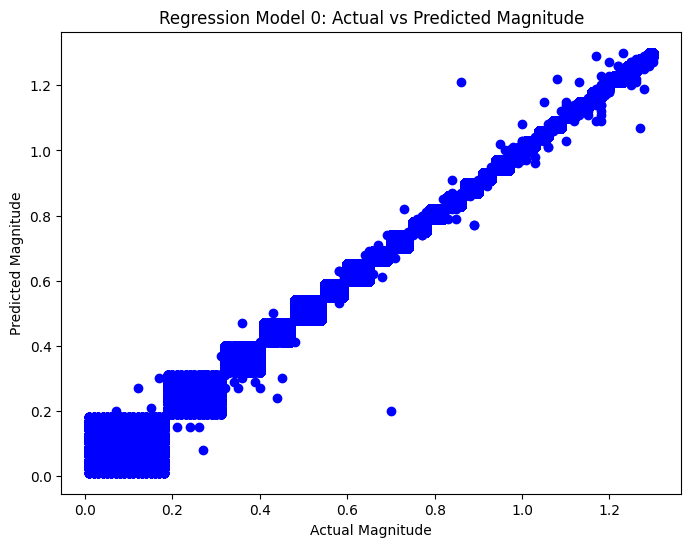

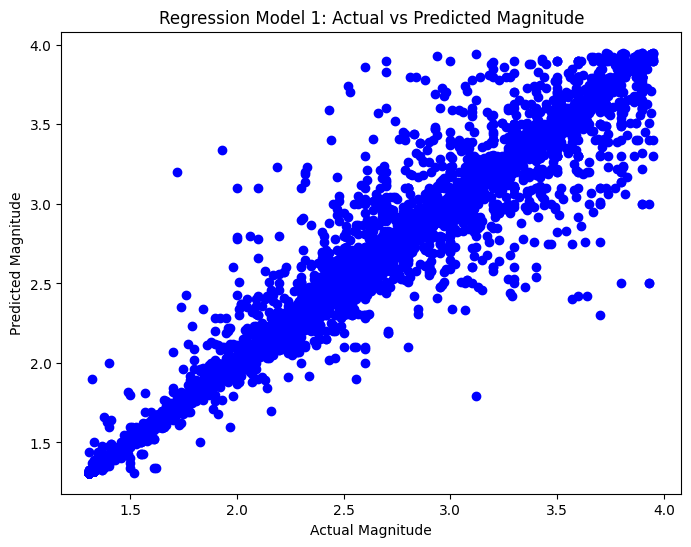

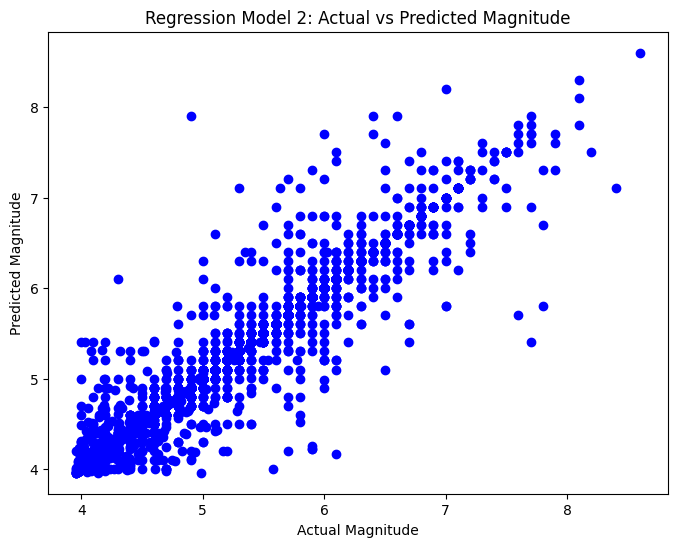

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_dt0, y_pred_reg_dt0, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 0: Actual vs Predicted Magnitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_dt1, y_pred_reg_dt1, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 1: Actual vs Predicted Magnitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_dt2, y_pred_reg_dt2, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 2: Actual vs Predicted Magnitude')
plt.show()

In [ ]:
df = pd.DataFrame({
    'significance': [637],
    'longitude': [-93.8771],
    'latitude': [15.0337]
})

input_features = scaler_reg.transform(input_df)

input_class = classifier.predict(input_features)[0]

print(f'Magnitude Class is {input_class}')

if input_class == 0:
    predicted_magnitude = regression_model_dt0.predict(input_features)
elif input_class == 1:
    predicted_magnitude = regression_model_dt1.predict(input_features)
else:
    predicted_magnitude = regression_model_dt2.predict(input_features)

    print("Predicted Magnitude:", predicted_magnitude[0])



Magnitude Class is 2
Predicted Magnitude: 6.3


XGB BOOST


In [ ]:
class_0 = dataframe[dataframe['magnitude_class'] == 0]
class_1 = dataframe[dataframe['magnitude_class'] == 1]
class_2 = dataframe[dataframe['magnitude_class'] == 2]

X_train_reg_xgb0, X_test_reg_xgb0, y_train_reg_xgb0, y_test_reg_xgb0 = train_test_split(class_0[['significance', 'longitude', 'latitude']], class_0['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_xgb1, X_test_reg_xgb1, y_train_reg_xgb1, y_test_reg_xgb1 = train_test_split(class_1[['significance', 'longitude', 'latitude']], class_1['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_xgb2, X_test_reg_xgb2, y_train_reg_xgb2, y_test_reg_xgb2 = train_test_split(class_2[['significance', 'longitude', 'latitude']], class_2['magnitudo'], test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg_xgb0 = scaler_reg.fit_transform(X_train_reg_xgb0)
X_test_scaled_reg_xgb0 = scaler_reg.transform(X_test_reg_xgb0)
X_train_scaled_reg_xgb1 = scaler_reg.fit_transform(X_train_reg_xgb1)
X_test_scaled_reg_xgb1 = scaler_reg.transform(X_test_reg_xgb1)
X_train_scaled_reg_xgb2 = scaler_reg.fit_transform(X_train_reg_xgb2)
X_test_scaled_reg_xgb2 = scaler_reg.transform(X_test_reg_xgb2)

# Add in diff models
regression_model_xgb0 = XGBRegressor(n_estimators=5, random_state=42)
regression_model_xgb1 = XGBRegressor(n_estimators=5, random_state=42)
regression_model_xgb2 = XGBRegressor(n_estimators=5, random_state=42)

regression_model_xgb0.fit(X_train_scaled_reg_xgb0, y_train_reg_xgb0)
regression_model_xgb1.fit(X_train_scaled_reg_xgb1, y_train_reg_xgb1)
regression_model_xgb2.fit(X_train_scaled_reg_xgb2, y_train_reg_xgb2)

y_pred_reg_xgb0 = regression_model_xgb0.predict(X_test_scaled_reg_xgb0)
y_pred_reg_xgb1 = regression_model_xgb1.predict(X_test_scaled_reg_xgb1)
y_pred_reg_xgb2 = regression_model_xgb2.predict(X_test_scaled_reg_xgb2)

In [ ]:
reg_0_mae_xgb = mean_absolute_error(y_test_reg_xgb0, y_pred_reg_xgb0)
reg_1_mae_xgb = mean_absolute_error(y_test_reg_xgb1, y_pred_reg_xgb1)
reg_2_mae_xgb = mean_absolute_error(y_test_reg_xgb2, y_pred_reg_xgb2)

reg_0_mse_xgb = mean_squared_error(y_test_reg_xgb0, y_pred_reg_xgb0)
reg_1_mse_xgb = mean_squared_error(y_test_reg_xgb1, y_pred_reg_xgb1)
reg_2_mse_xgb = mean_squared_error(y_test_reg_xgb2, y_pred_reg_xgb2)

reg_0_r2_xgb = r2_score(y_test_reg_xgb0, y_pred_reg_xgb0)
reg_1_r2_xgb = r2_score(y_test_reg_xgb1, y_pred_reg_xgb1)
reg_2_r2_xgb = r2_score(y_test_reg_xgb2, y_pred_reg_xgb2)

print("Regression Model 0 - MAE:", reg_0_mae_xgb)
print("Regression Model 1 - MAE:", reg_1_mae_xgb)
print("Regression Model 2 - MAE:", reg_2_mae_xgb)

print("Regression Model 0 - MSE:", reg_0_mse_xgb)
print("Regression Model 1 - MSE:", reg_1_mse_xgb)
print("Regression Model 2 - MSE:", reg_2_mse_xgb)

print("Regression Model 0 - R^2 Score:", reg_0_r2_xgb)
print("Regression Model 1 - R^2 Score:", reg_1_r2_xgb)
print("Regression Model 2 - R^2 Score:", reg_2_r2_xgb)

Regression Model 0 - MAE: 0.047354000367858
Regression Model 1 - MAE: 0.08709449179376481
Regression Model 2 - MAE: 0.05793834555823376
Regression Model 0 - MSE: 0.0033812328679362486
Regression Model 1 - MSE: 0.012036247101674278
Regression Model 2 - MSE: 0.008645309673882252
Regression Model 0 - R^2 Score: 0.9691762409223764
Regression Model 1 - R^2 Score: 0.9701382690852481
Regression Model 2 - R^2 Score: 0.9544000607227129


In [ ]:
input_df = pd.DataFrame({
    'significance': [637],
    'longitude': [-93.8771],
    'latitude': [15.0337]
})

input_features = scaler_reg.transform(input_df)

input_class = classifier.predict(input_features)[0]

print(f'Magnitude Class is {input_class}')

if input_class == 0:
    predicted_magnitude = regression_model_xgb0.predict(input_features)
elif input_class == 1:
    predicted_magnitude = regression_model_xgb1.predict(input_features)
else:
    predicted_magnitude = regression_model_xgb2.predict(input_features)

print("Predicted Magnitude:", predicted_magnitude[0])

Magnitude Class is 2
Predicted Magnitude: 5.844403


**ADA BOOST**

In [ ]:
class_0 = dataframe[dataframe['magnitude_class'] == 0]
class_1 = dataframe[dataframe['magnitude_class'] == 1]
class_2 = dataframe[dataframe['magnitude_class'] == 2]

X_train_reg_ad0, X_test_reg_ad0, y_train_reg_ad0, y_test_reg_ad0 = train_test_split(class_0[['significance', 'longitude', 'latitude']], class_0['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_ad1, X_test_reg_ad1, y_train_reg_ad1, y_test_reg_ad1 = train_test_split(class_1[['significance', 'longitude', 'latitude']], class_1['magnitudo'], test_size=0.2, random_state=42)
X_train_reg_ad2, X_test_reg_ad2, y_train_reg_ad2, y_test_reg_ad2 = train_test_split(class_2[['significance', 'longitude', 'latitude']], class_2['magnitudo'], test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg_ad0 = scaler_reg.fit_transform(X_train_reg_ad0)
X_test_scaled_reg_ad0 = scaler_reg.transform(X_test_reg_ad0)
X_train_scaled_reg_ad1 = scaler_reg.fit_transform(X_train_reg_ad1)
X_test_scaled_reg_ad1 = scaler_reg.transform(X_test_reg_ad1)
X_train_scaled_reg_ad2 = scaler_reg.fit_transform(X_train_reg_ad2)
X_test_scaled_reg_ad2 = scaler_reg.transform(X_test_reg_ad2)

# Add in diff models
regression_model_ad0 = AdaBoostRegressor(n_estimators=50, random_state=42)
regression_model_ad1 = AdaBoostRegressor(n_estimators=50, random_state=42)
regression_model_ad2 = AdaBoostRegressor(n_estimators=50, random_state=42)

regression_model_ad0.fit(X_train_scaled_reg_ad0, y_train_reg_ad0)
regression_model_ad1.fit(X_train_scaled_reg_ad1, y_train_reg_ad1)
regression_model_ad2.fit(X_train_scaled_reg_ad2, y_train_reg_ad2)

y_pred_reg_ad0 = regression_model_ad0.predict(X_test_scaled_reg_ad0)
y_pred_reg_ad1 = regression_model_ad1.predict(X_test_scaled_reg_ad1)
y_pred_reg_ad2 = regression_model_ad2.predict(X_test_scaled_reg_ad2)

In [ ]:
reg_0_mae_ad = mean_absolute_error(y_test_reg_ad0, y_pred_reg_ad0)
reg_1_mae_ad = mean_absolute_error(y_test_reg_ad1, y_pred_reg_ad1)
reg_2_mae_ad = mean_absolute_error(y_test_reg_ad2, y_pred_reg_ad2)

reg_0_mse_ad = mean_squared_error(y_test_reg_ad0, y_pred_reg_ad0)
reg_1_mse_ad = mean_squared_error(y_test_reg_ad1, y_pred_reg_ad1)
reg_2_mse_ad = mean_squared_error(y_test_reg_ad2, y_pred_reg_ad2)

reg_0_r2_ad = r2_score(y_test_reg_ad0, y_pred_reg_ad0)
reg_1_r2_ad = r2_score(y_test_reg_ad1, y_pred_reg_ad1)
reg_2_r2_ad = r2_score(y_test_reg_ad2, y_pred_reg_ad2)

print("Regression Model 0 - MAE:", reg_0_mae_ad)
print("Regression Model 1 - MAE:", reg_1_mae_ad)
print("Regression Model 2 - MAE:", reg_2_mae_ad)

print("Regression Model 0 - MSE:", reg_0_mse_ad)
print("Regression Model 1 - MSE:", reg_1_mse_ad)
print("Regression Model 2 - MSE:", reg_2_mse_ad)

print("Regression Model 0 - R^2 Score:", reg_0_r2_ad)
print("Regression Model 1 - R^2 Score:", reg_1_r2_ad)
print("Regression Model 2 - R^2 Score:", reg_2_r2_ad)

Regression Model 0 - MAE: 0.04475845659518218
Regression Model 1 - MAE: 0.07879677190034928
Regression Model 2 - MAE: 0.07314022193333573
Regression Model 0 - MSE: 0.0031271394883314297
Regression Model 1 - MSE: 0.0123338411236173
Regression Model 2 - MSE: 0.01618482135842234
Regression Model 0 - R^2 Score: 0.9714925892550893
Regression Model 1 - R^2 Score: 0.9693999432158943
Regression Model 2 - R^2 Score: 0.9146326853522204


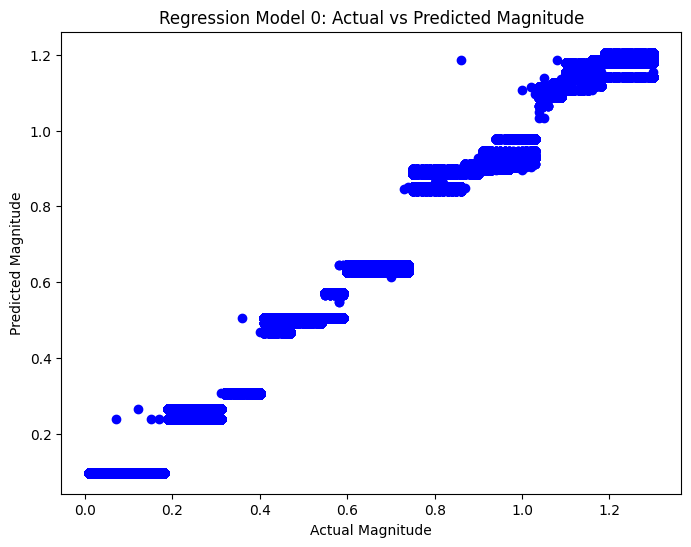

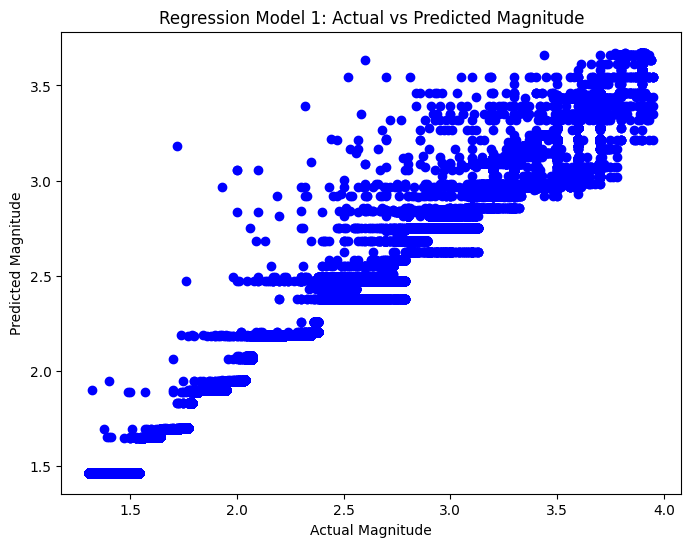

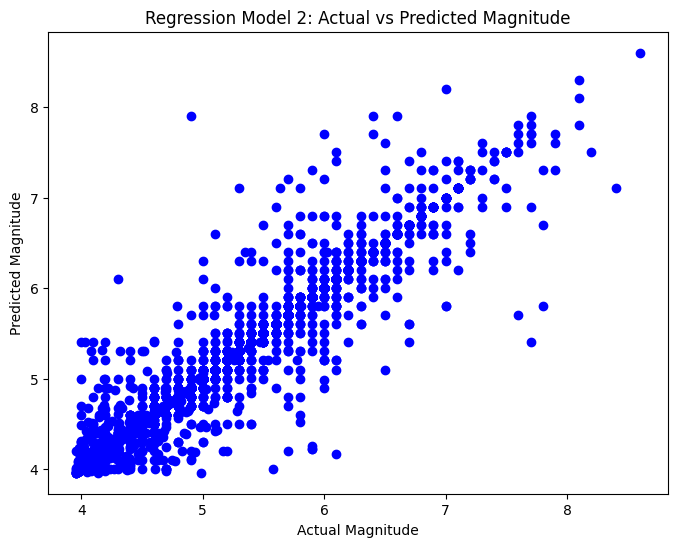

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_ad0, y_pred_reg_ad0, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 0: Actual vs Predicted Magnitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_ad1, y_pred_reg_ad1, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 1: Actual vs Predicted Magnitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg_dt2, y_pred_reg_dt2, color='blue')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Regression Model 2: Actual vs Predicted Magnitude')
plt.show()

In [ ]:
input_df = pd.DataFrame({
    'significance': [637],
    'longitude': [-93.8771],
    'latitude': [15.0337]
})

input_features = scaler_reg.transform(input_df)

input_class = classifier.predict(input_features)[0]

print(f'Magnitude Class is {input_class}')

if input_class == 0:
    predicted_magnitude = regression_model_ad0.predict(input_features)
elif input_class == 1:
    predicted_magnitude = regression_model_ad1.predict(input_features)
else:
    predicted_magnitude = regression_model_ad2.predict(input_features)

print("Predicted Magnitude:", predicted_magnitude[0])

Magnitude Class is 2
Predicted Magnitude: 5.65122143191643
